# Music2Latent tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/music2latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'onset-benchmark'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/onset-benchmark.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies
        !git clone https://github.com/inspektral/music2latent.git

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

/home/inspektral/miniconda3/envs/mir/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-12 21:02:51.219199: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 21:02:51.228437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-12 21:02:51.237902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-12 21:

In [3]:
import test_signals

tests = {}

for name, obj in vars(test_signals).items():
    if callable(obj):
        tests[name] = obj

print("Available tests:")
for i, name in enumerate(tests.keys()):
    print(f"{i}: {name}")

Available tests:
0: square_slow
1: square_fast
2: square_vibrato
3: saw_noise
4: sines_noise
5: filter_saw
6: triangle_clip
7: fm_amplitude
8: fm_frequency
9: delay_noise
10: delay_saw
11: reverb_noise
12: reverb_saw


In [4]:
SAMPLE_RATE = 44100
CURRENT_TEST = 0
SMALL = False

Running test: square_slow


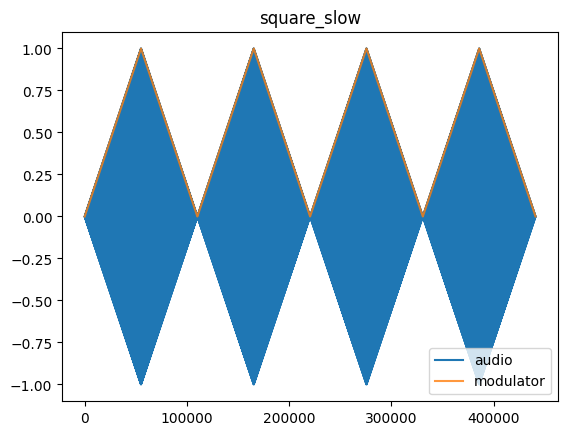

In [5]:
test = tests[list(tests.keys())[CURRENT_TEST]]
print(f"Running test: {test.__name__}")
test_name = test.__name__
audio, modulator = test()

plt.plot(audio, label='audio')
modulator = utils.norm(synth.stretch_array(modulator, len(audio)))
plt.plot(modulator, alpha=0.8, label='modulator')
plt.title(test.__name__)
plt.legend()

plt.show()

display(Audio(audio, rate=SAMPLE_RATE)) 

In [6]:
representations = utils.get_representations(audio)

Computing mfcc representation...
Computing cqt representation...
Computing spectrum representation...
Computing music2latent representation...
Computing dac representation...


/home/inspektral/miniconda3/envs/mir/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


In [17]:
def calculate_metric(representations, func, parameters=None):
    magnitudes = []
    d_magnitudes = []
    dd_magnitudes = []
    for key in representations.keys():
        magnitude = func(representations[key], **(parameters or {}))
        magnitudes.append(magnitude)
        d_magnitude = np.diff(magnitude)
        d_magnitudes.append(d_magnitude)
        dd_magnitude = np.diff(d_magnitude)
        dd_magnitudes.append(dd_magnitude)
    return magnitudes, d_magnitudes, dd_magnitudes

Plotting label 1 with length 862
Plotting label 2 with length 862
Plotting label 3 with length 431
Plotting label 4 with length 424
Plotting label 5 with length 862
Plotting First Derivative 1 with length 861
Plotting First Derivative 2 with length 861
Plotting First Derivative 3 with length 430
Plotting First Derivative 4 with length 423
Plotting First Derivative 5 with length 861
Plotting Second Derivative 1 with length 860
Plotting Second Derivative 2 with length 860
Plotting Second Derivative 3 with length 429
Plotting Second Derivative 4 with length 422
Plotting Second Derivative 5 with length 860


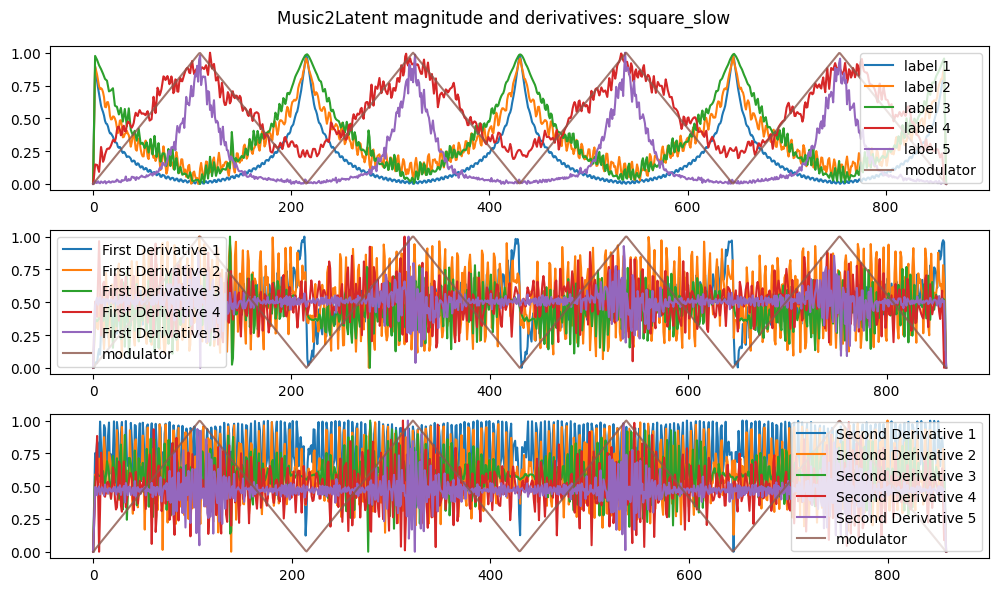

In [18]:
magnitude, d_magnitude, dd_magnitude = calculate_metric(representations, np.linalg.norm, {"axis": 0})

utils.plot_with_derivatives(
    magnitude,
    d_magnitude,
    dd_magnitude,
    modulator,
    title="Music2Latent magnitude and derivatives: "+test_name,
    small=SMALL
)

In [9]:
print(len(magnitude))

5


distances shape: (20, 861)
distances shape: (84, 861)
distances shape: (2049, 430)
distances shape: (64, 423)
distances shape: (72, 861)
Plotting label 1 with length 861
Plotting label 2 with length 861
Plotting label 3 with length 430
Plotting label 4 with length 423
Plotting label 5 with length 861
Plotting First Derivative 1 with length 860
Plotting First Derivative 2 with length 860
Plotting First Derivative 3 with length 429
Plotting First Derivative 4 with length 422
Plotting First Derivative 5 with length 860
Plotting Second Derivative 1 with length 859
Plotting Second Derivative 2 with length 859
Plotting Second Derivative 3 with length 428
Plotting Second Derivative 4 with length 421
Plotting Second Derivative 5 with length 859


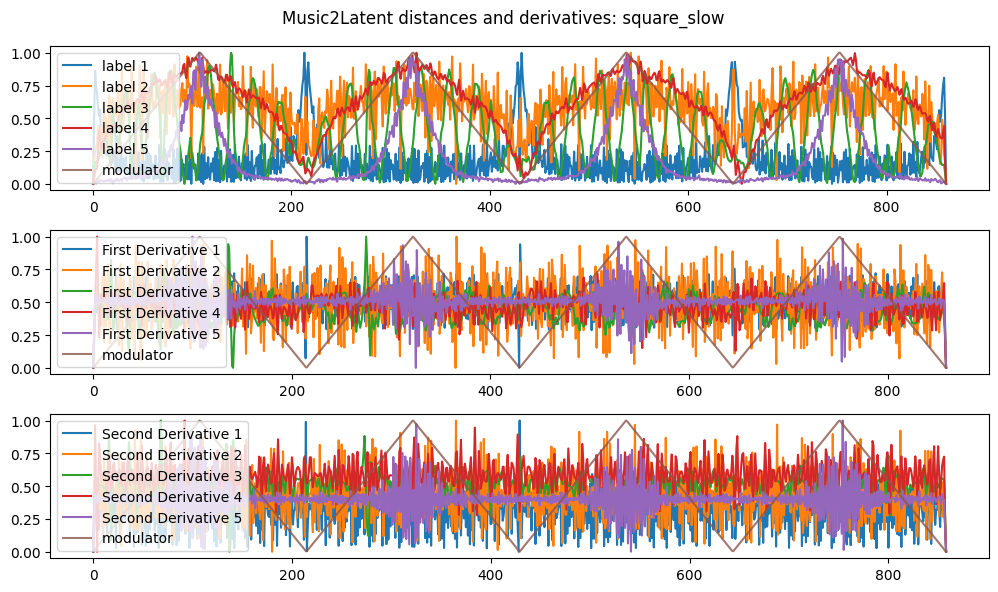

In [19]:
distances, d_distances, dd_distances = calculate_metric(representations, utils.distances)

utils.plot_with_derivatives(
    distances,
    d_distances,
    dd_distances,
    modulator,
    title="Music2Latent distances and derivatives: "+test_name,
    small=SMALL
)


Plotting label 1 with length 861
Plotting label 2 with length 861
Plotting label 3 with length 430
Plotting label 4 with length 423
Plotting label 5 with length 861
Plotting First Derivative 1 with length 860
Plotting First Derivative 2 with length 860
Plotting First Derivative 3 with length 429
Plotting First Derivative 4 with length 422
Plotting First Derivative 5 with length 860
Plotting Second Derivative 1 with length 859
Plotting Second Derivative 2 with length 859
Plotting Second Derivative 3 with length 428
Plotting Second Derivative 4 with length 421
Plotting Second Derivative 5 with length 859


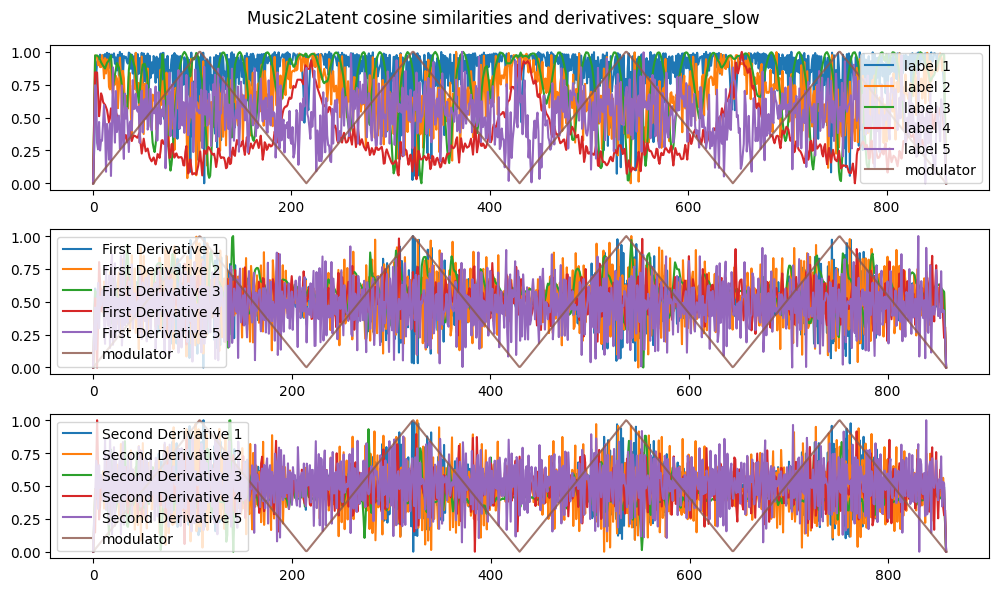

In [21]:
similarities, d_similarities, dd_similarities = calculate_metric(representations, utils.cosine_similarity)

utils.plot_with_derivatives(
    similarities,
    d_similarities,
    dd_similarities,
    modulator,
    title="Music2Latent cosine similarities and derivatives: "+test_name,
    small=SMALL
)